<a href="https://colab.research.google.com/github/clairew99/E1I4_MachinLearning/blob/main/WineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
redwine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)
whitewine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)
wine = redwine.append(whitewine, ignore_index=True)
#wine = redwine.append(whitewine)

df = wine

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

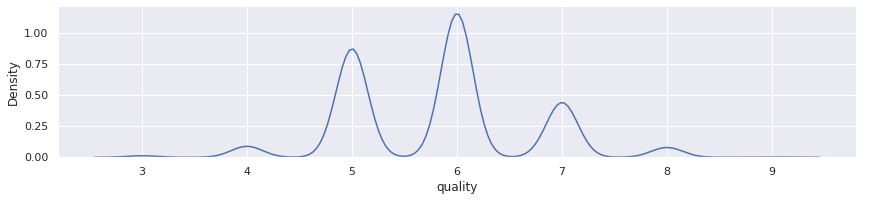

In [ ]:
#qaulity 분포 확인
graph = sns.FacetGrid(df, aspect=4)
graph.map(sns.kdeplot, 'quality')
graph.add_legend()

plt.show()

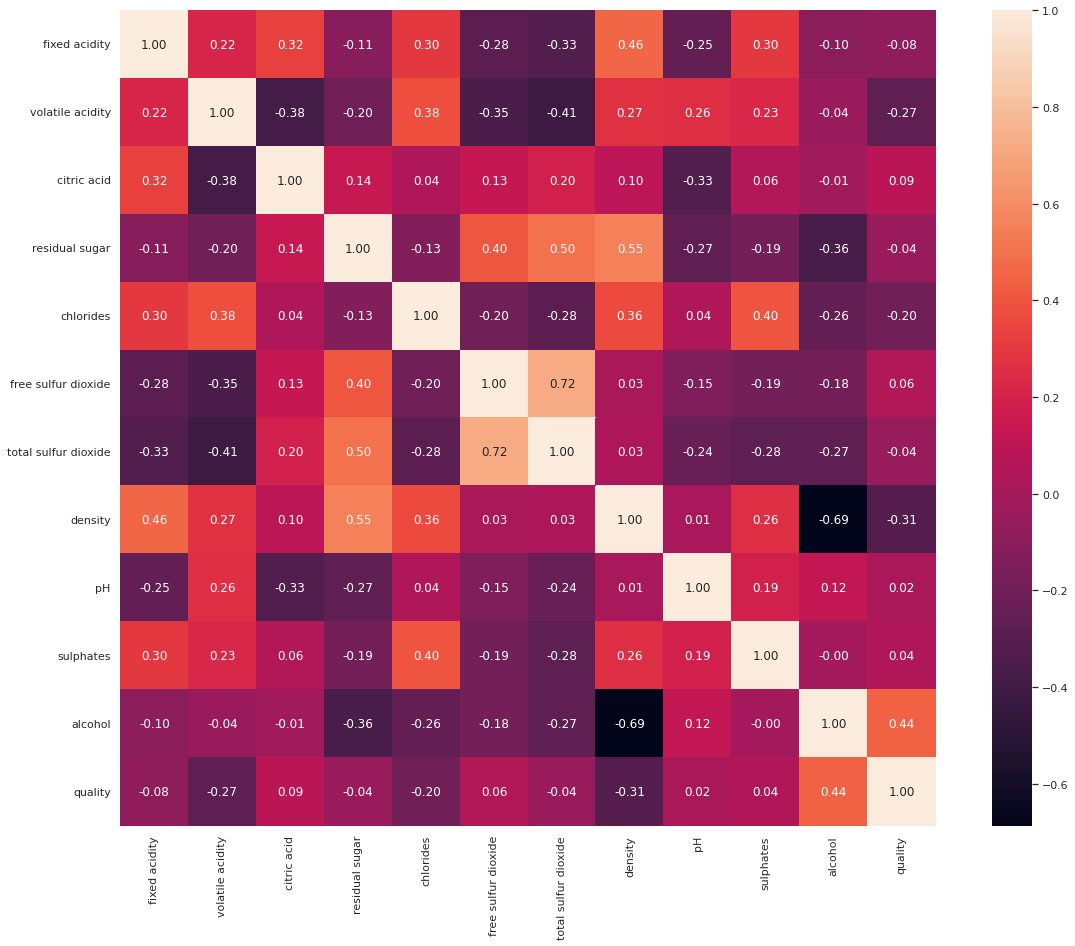

In [ ]:
# 우리가 최종적으로 알고자 하는 quality와 다른 변수 간의 상관계수 파악
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)

plt.show()

#추후에 변수 선택시에 도움됨

In [ ]:
input_data = df.drop(['quality'], axis=1)
target_data = df['quality']

print(input_data.shape, target_data.shape)

(6497, 11) (6497,)


In [ ]:
#training set과 testing set 분류
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2) 

print(x_train.shape, x_test.shape,  y_train.shape, y_test.shape)

(5197, 11) (1300, 11) (5197,) (1300,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor#회귀!!!! 분류(classifier아님 주의!!)

forest = RandomForestRegressor(random_state=100, oob_score=True, n_estimators=1000)

In [ ]:
forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=100)

In [ ]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 0.934929014743098


In [ ]:
print('testing set accuracy:', forest.score(x_test, y_test))

testing set accuracy: 0.5244589228462526


In [ ]:
from collections import defaultdict

import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform


In [ ]:
feature_names = ['fixed acidity', 'volatile acidity',	'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

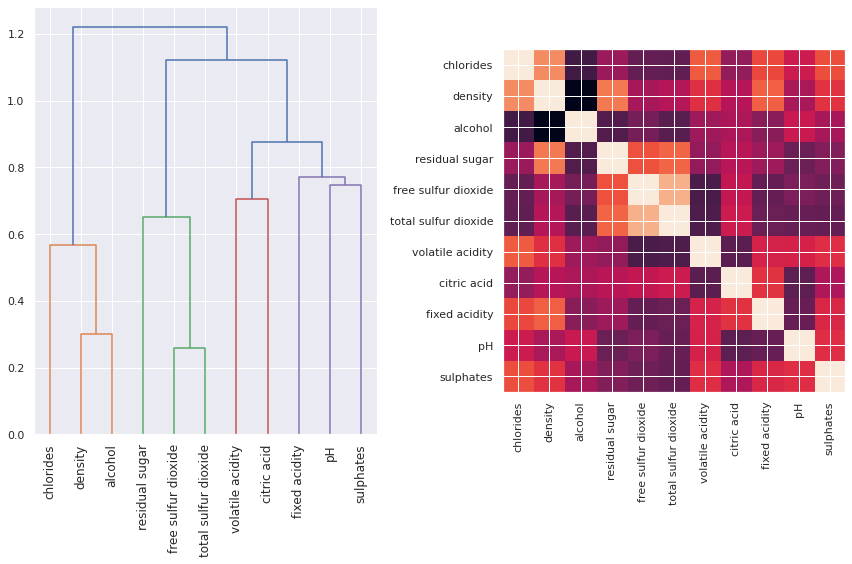

In [ ]:
#feature 간 연관 관계 확인
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(input_data).correlation

corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=feature_names, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))


ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [ ]:
#성능을 높이기 위해 permutation importance를 이용하여 feature ranking 확인
from sklearn.inspection import permutation_importance

r = permutation_importance(forest, x_train, y_train, n_repeats=30, random_state=42)

In [ ]:
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{feature_names[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

alcohol 0.743 +/- 0.011
volatile acidity0.401 +/- 0.007
free sulfur dioxide0.237 +/- 0.005
sulphates0.179 +/- 0.004
total sulfur dioxide0.135 +/- 0.002
residual sugar0.122 +/- 0.002
citric acid0.117 +/- 0.003
pH      0.116 +/- 0.002
chlorides0.114 +/- 0.002
density 0.082 +/- 0.001
fixed acidity0.075 +/- 0.001


In [ ]:
#feature importance score에 따른 ranking 확인
feature_imp = pd.Series(r.importances_mean, feature_names).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Permutation Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [ ]:
#상위에 랭크된 6개 feature만 남기고 다시 학습
input_data = df.drop(columns = ['citric acid', 'pH', 'chlorides', 'density', 'fixed acidity', 'quality'])
target_data = df['quality']

print(input_data.shape, target_data.shape)

(6497, 6) (6497,)


In [ ]:
input_data.describe()

,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.339666,5.443235,30.525319,115.744574,0.531268,10.491801
std,0.164636,4.757804,17.749400,56.521855,0.148806,1.192712
min,0.080000,0.600000,1.000000,6.000000,0.220000,8.000000
25%,0.230000,1.800000,17.000000,77.000000,0.430000,9.500000
50%,0.290000,3.000000,29.000000,118.000000,0.510000,10.300000
75%,0.400000,8.100000,41.000000,156.000000,0.600000,11.300000
max,1.580000,65.800000,289.000000,440.000000,2.000000,14.900000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2) 

In [ ]:
forest = RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 0.9281956825122211


In [ ]:
print('testsing set accuracy:', forest.score(x_test, y_test))

testsing set accuracy: 0.4711926745081634


In [71]:
import pandas as pd

real = pd.DataFrame({'wine name':['Ramon Bilbao', 'Montgras', 'Alejandro Fernandez', 'Alpha Estate', 'Amayna', 'Caro', 'Costa Mediana', 'Erasmo', 'Offley', 'Champagne Drappier, Quattuor'],
                     'consumer score':[8.2, 6.4, 6.0, 9.0, 9.6, 9.4, 7.2, 7.6, 8.6, 9.6],
                     'volatile acidity':[0.8, 0.6, 0.8, 0.8, 0.6, 0.6, 0.6, 0.8, 0.8, 1.0], 
                     'residual sugar':[1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 6.5, 1.8], 
                     'free sulfur dioxide' : [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0], 
                     'total sulfur dioxide' : [115.0, 115.0, 115.0, 115.0, 115.0, 115.0, 115.0, 115.0, 115.0, 115.0], 
                     'sulphates':[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 
                     'alcohol':[14.0, 14.0, 13.0, 13.5, 13.5, 14.5, 16.0, 12.5, 19.0, 13.0]})
real.columns = ['wine name', 'consumer score', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
real_test = real[['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']]
consumer_score = real['consumer score']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


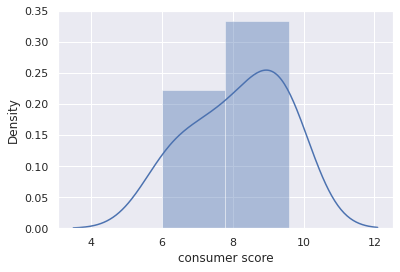

In [72]:
# 사이트 소비자 평점 분포 확인
sns.distplot(consumer_score, kde=True, rug=False)
plt.show()

In [73]:
# forest 모델이 평가한 평점 
score_df = pd.DataFrame(columns=range(10))

for i in range (0, 10) :
  data = real_test.iloc[i]
  data.columns = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
  score = forest.predict([data])
  score_df[i] = score

score_df

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not h

,0,1,2,3,4,5,6,7,8,9
0,7.0,7.04,6.98,6.94,6.98,7.04,7.04,6.8,7.08,6.94


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


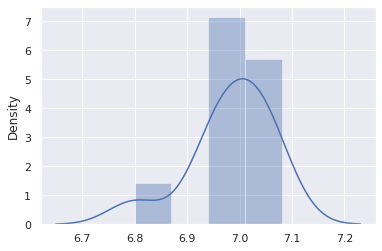

In [74]:
# 모델이 평가한 평점 분포 확인
sns.distplot(score_df, kde=True, rug=False)
plt.show()

In [ ]:
# 와인 정보
# 1. https://www.wine21.com/13_search/wine_view.html?Idx=166442
# 2. https://www.wine21.com/13_search/wine_view.html?Idx=170177
# 3. https://www.wine21.com/13_search/wine_view.html?Idx=166481
# 4. https://www.wine21.com/13_search/wine_view.html?Idx=171290
# 5. https://www.wine21.com/13_search/wine_view.html?Idx=171388
# 6. https://www.wine21.com/13_search/wine_view.html?Idx=154947
# 7. https://www.wine21.com/13_search/wine_view.html?Idx=167905
# 8. https://www.wine21.com/13_search/wine_view.html?Idx=166749
# 9. https://www.wine21.com/13_search/wine_view.html?Idx=170457
# 10. https://www.wine21.com/13_search/wine_view.html?Idx=168961